# Importing Libraries

In [625]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import glob

In [626]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [627]:
csv_files = glob.glob('*.csv')

dataframes = []
for file in csv_files:
    if file != 'names.csv':  # Skip the 'name.csv' file
        df = pd.read_csv(file)
        dataframes.append(df)

merged_df = pd.concat(dataframes, ignore_index=True)

merged_df.to_csv('merged_dataset.csv', index=False)

In [628]:
names = pd.read_csv("names.csv")
df = pd.read_csv("merged_dataset.csv")

In [629]:
df.shape, names.shape

In [630]:
df = pd.read_csv("final_data.csv")

In [631]:
# Rename the first 64 columns of DataFrame 'df'

new_column_names = f['Column Names'].tolist()

df_columns_except_target = df.columns[:-1]  
df.columns = new_column_names + [df.columns[-1]]

df.rename(columns={'Y': 'bankrupt'}, inplace=True)

In [632]:
df.duplicated().sum()

1

In [633]:
df.drop_duplicates(inplace = True)

## Summary statistics of a DataFrame

In [634]:
df.describe()

net profit / total assets  total liabilities / total assets  \
count               43003.000000                      43003.000000   
mean                    0.063849                          0.499571   
std                     0.121913                          0.295915   
min                    -0.211401                         -0.349776   
25%                     0.003393                          0.269915   
50%                     0.049660                          0.472360   
75%                     0.129715                          0.689050   
max                     0.369865                          1.347230   

       working capital / total assets  \
count                    43003.000000   
mean                         0.205705   
std                          0.301360   
min                         -0.586498   
25%                          0.021583   
50%                          0.196830   
75%                          0.403595   
max                          1.023567   

       current assets / short-term liabilities  \
count                             43003.000000   
mean                                  2.138688   
std                                   1.534394   
min                                  -0.403110   
25%                                   1.050700   
50%                                   1.571000   
75%                                   2.780150   
max                                   5.819200   

       [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365  \
count                                       43003.000000                                                                   
mean                                            1.308183                                                                   
std                                           100.299175                                                                   
min                                          -214.216000                                                                   
25%                                           -49.005500                                                                   
50%                                            -0.853730                                                                   
75%                                            50.566000                                                                   
max                                           218.334000                                                                   

       retained earnings / total assets  EBIT / total assets  \
count                      43003.000000         43003.000000   
mean                           0.032284             0.076478   
std                            0.105655             0.137793   
min                           -0.217890            -0.244659   
25%                            0.000000             0.005755   
50%                            0.000000             0.059610   
75%                            0.087665             0.151065   
max                            0.363150             0.430839   

       book value of equity / total liabilities  sales / total assets  \
count                              43003.000000          43003.000000   
mean                                   1.814886              1.600098   
std                                    1.911400              0.905400   
min                                   -2.913600             -0.612590   
25%                                    0.429635              1.018900   
50%                                    1.067700              1.198700   
75%                                    2.597400              2.069100   
max                                    6.451670              4.124375   

       equity / total assets  ...  (sales - cost of products sold) / sales  \
count           43003.000000  ...                             43003.000000   
mean                0.482852  ...              

# Plotting heatmap to see correlation between the features

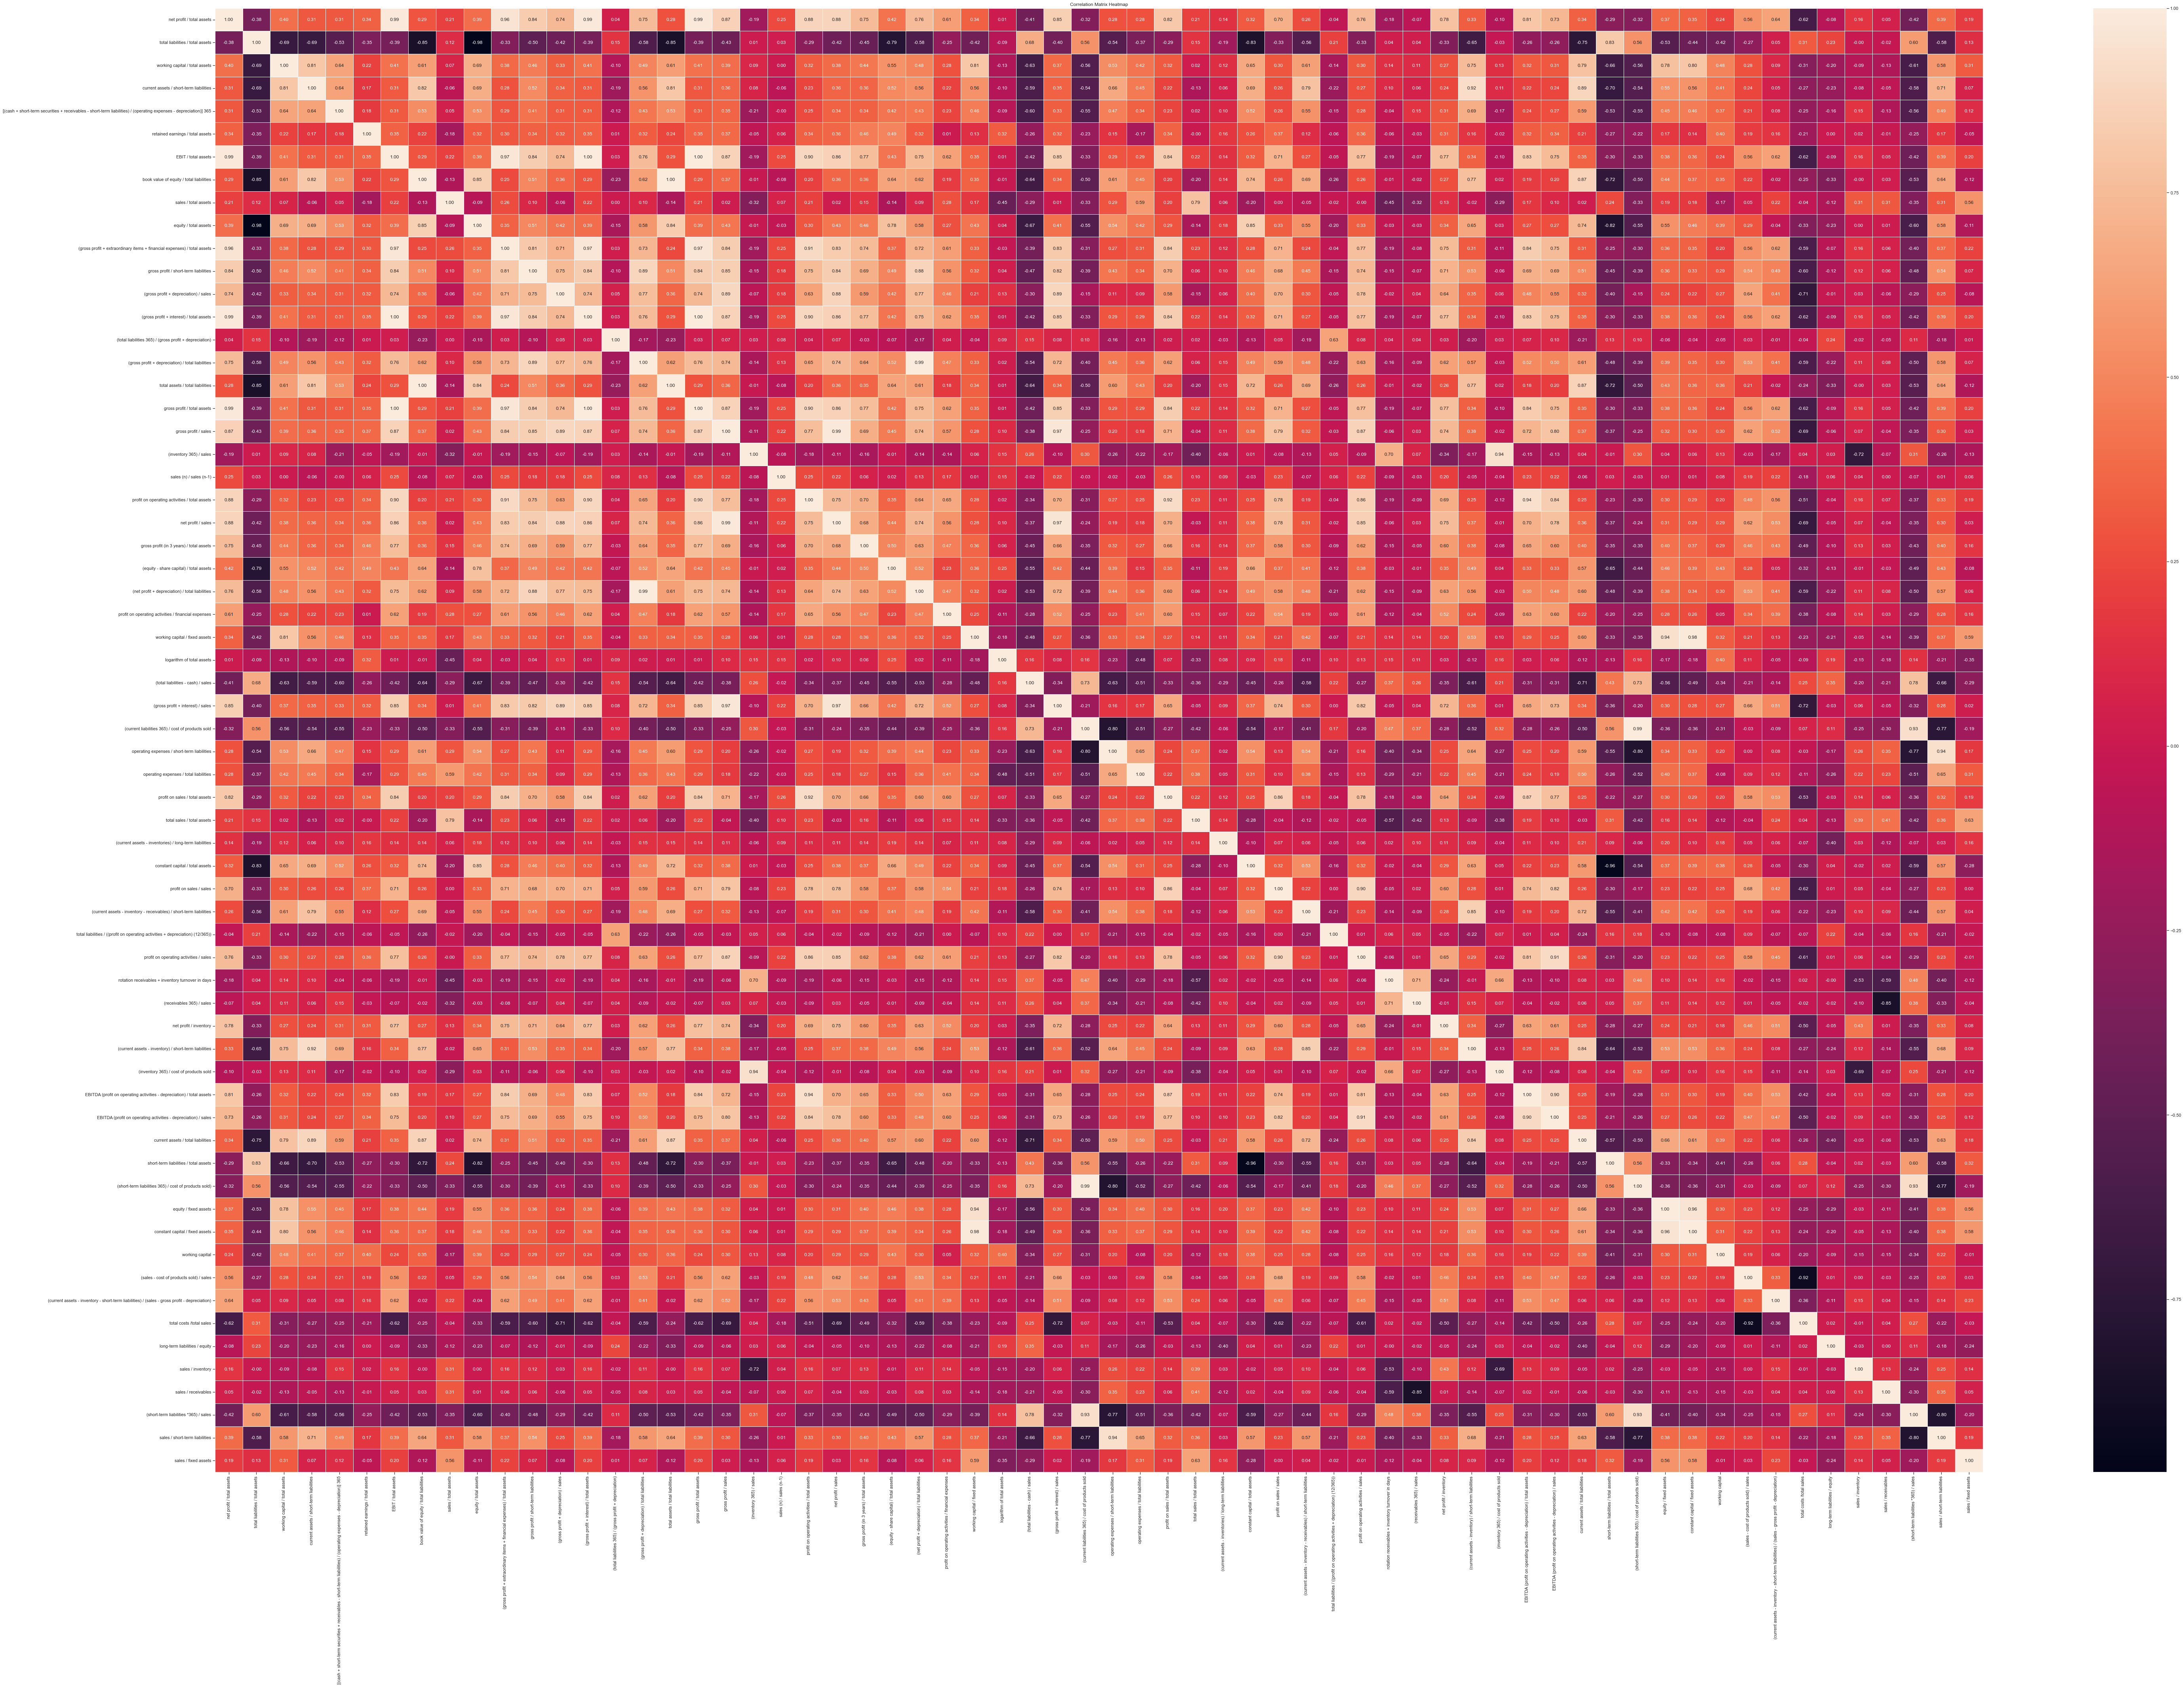

In [635]:
input_features = df.drop("bankrupt", axis=1)

correlation_matrix = input_features.corr()
plt.figure(figsize=(100, 68))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Text(0.5, 1.0, ' Return on Assets (ROA) data distribution ')

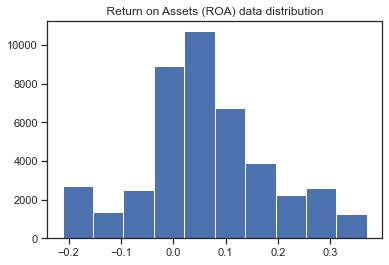

In [636]:
# Data distribution
# EDA on " Net profit / Total assets
plt.hist(df['net profit / total assets'],bins=10)
plt.title(" Return on Assets (ROA) data distribution ")

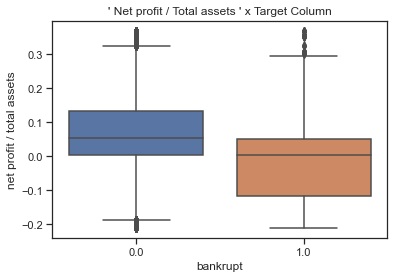

In [637]:
# Relation with the target column 

sns.boxplot(df['bankrupt'], df['net profit / total assets'])
plt.title("' Net profit / Total assets ' x Target Column")
plt.show()

<AxesSubplot:xlabel='net profit / total assets', ylabel='gross profit / total assets'>

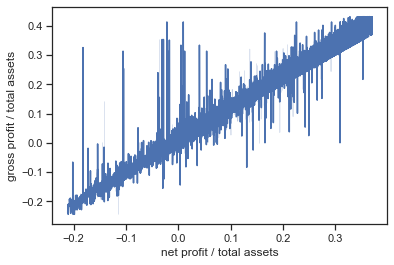

In [740]:
# relation between 'net profit / total assets' and 'gross profit / total assets' 
sns.lineplot(df['net profit / total assets'],df['gross profit / total assets'])

Text(0.5, 1.0, "'net profit / total assets' x 'gross profit / total assets'")

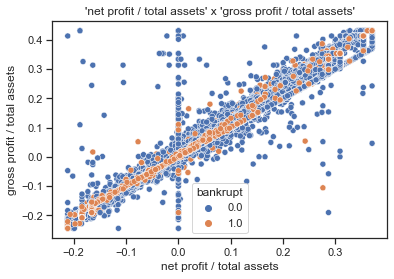

In [741]:
# Scatterplot between 'net profit / total assets' x 'gross profit / total assets' x 'Bankrupt'
sns.scatterplot(df['net profit / total assets'], df['gross profit / total assets'], hue=df['bankrupt'])
plt.title("'net profit / total assets' x 'gross profit / total assets'")

<h1 style="color:purple;">EDA on "Total liabilities / Total assets"</h1>

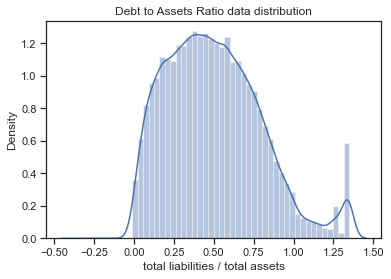

In [638]:
# Data distribution

sns.distplot(df["total liabilities / total assets"], kde=True) 
plt.title("Debt to Assets Ratio data distribution")
plt.show()

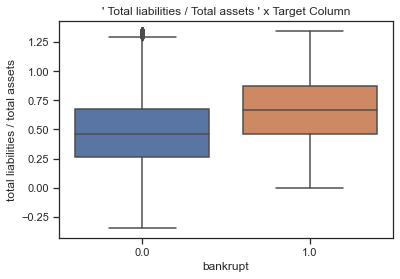

In [639]:
# Relation with the target column 

sns.boxplot(df['bankrupt'], df['total liabilities / total assets'])
plt.title("' Total liabilities / Total assets ' x Target Column")
plt.show()

<h1 style="color:purple;">EDA on "Working capital / Total assets"</h1>

Text(0.5, 1.0, ' Working Capital to Total Assets ratio data distribution')

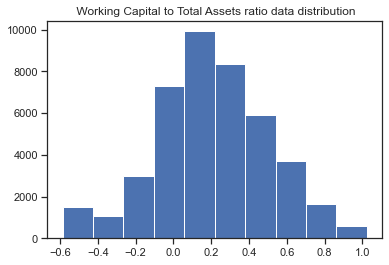

In [640]:
# Data distribution

plt.hist(df['working capital / total assets'],bins=10)
plt.title(" Working Capital to Total Assets ratio data distribution")

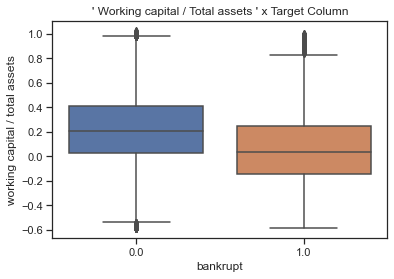

In [641]:
# Relation with the target column 

sns.boxplot(df['bankrupt'], df['working capital / total assets'])
plt.title("' Working capital / Total assets ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Current assets / Short-term liabilities " </h1>

Text(0.5, 1.0, ' Current Ratio data distribution')

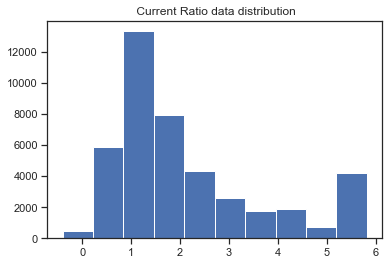

In [642]:
# Data distribution

plt.hist(df['current assets / short-term liabilities'],bins=10)
plt.title (" Current Ratio data distribution")

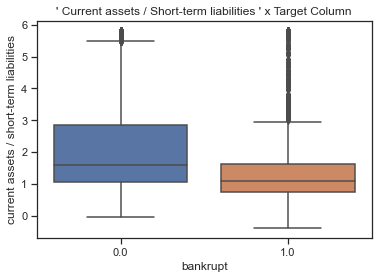

In [643]:
# Relation with the target column 

sns.boxplot(df['bankrupt'], df['current assets / short-term liabilities'])
plt.title("' Current assets / Short-term liabilities ' x Target Column")
plt.show()

<AxesSubplot:xlabel='current assets / short-term liabilities', ylabel='(current assets - inventory) / short-term liabilities'>

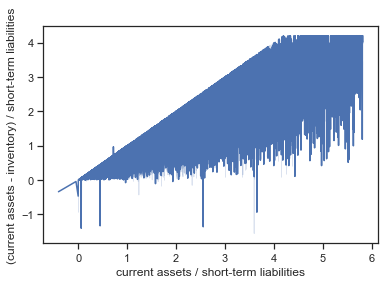

In [743]:
# relation between 'current assets / short-term liabilities' and '(current assets - inventory) / short-term liabilities' 
sns.lineplot(df['current assets / short-term liabilities'],df['(current assets - inventory) / short-term liabilities'])

Text(0.5, 1.0, "'current assets / short-term liabilities' x '(current assets - inventory) / short-term liabilities'")

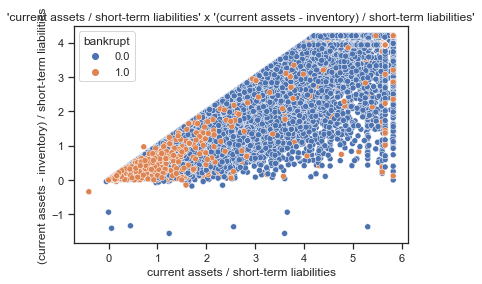

In [744]:
# Scatterplot between 'current assets / short-term liabilities' x '(current assets - inventory) / short-term liabilities' x 'Bankrupt'
sns.scatterplot(df['current assets / short-term liabilities'], df['(current assets - inventory) / short-term liabilities'], hue=df['bankrupt'])
plt.title("'current assets / short-term liabilities' x '(current assets - inventory) / short-term liabilities'")

<h1 style="color:purple;"> EDA on " Retained earnings / Total assets " </h1>

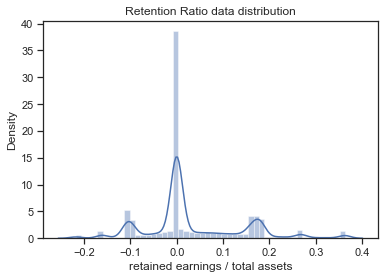

In [644]:
# Data distribution

sns.distplot(df["retained earnings / total assets"], kde=True)  
plt.title("Retention Ratio data distribution")
plt.show()

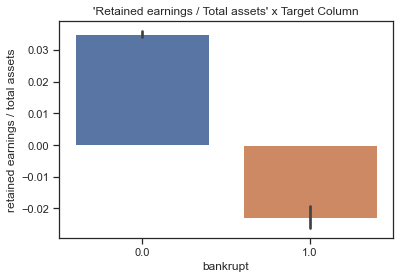

In [645]:
# Relation with the target column 


sns.barplot(df['bankrupt'], df['retained earnings / total assets'])
plt.title("'Retained earnings / Total assets' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " EBIT / Total assets " </h1>

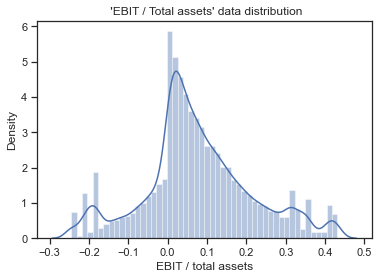

In [646]:
# Data distribution

sns.distplot(df["EBIT / total assets"], kde=True)  
plt.title(" 'EBIT / Total assets' data distribution")
plt.show()

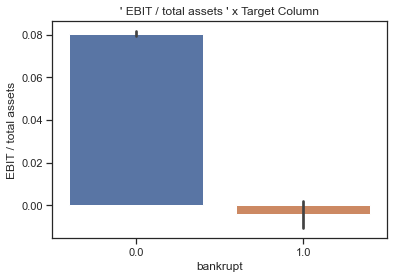

In [647]:
# Relation with the target column 

sns.barplot(df['bankrupt'], df['EBIT / total assets'])
plt.title("' EBIT / total assets ' x Target Column")
plt.show()

Text(0.5, 1.0, "'Net profit / Total assets' x 'EBIT / Total assets' x 'Bankrupt'")

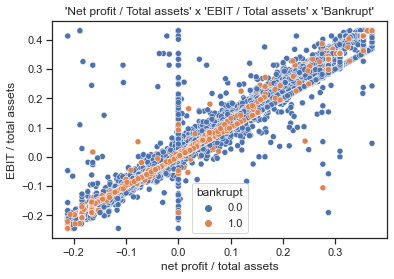

In [648]:
# Scatterplot between 'Net profit / Total assets' x 'EBIT / Total assets' x 'Bankrupt'

sns.scatterplot(df['net profit / total assets'], df['EBIT / total assets'], hue=df['bankrupt'])
plt.title("'Net profit / Total assets' x 'EBIT / Total assets' x 'Bankrupt'")

<h1 style="color:purple;"> EDA on " Book value of equity / Total liabilities " </h1>

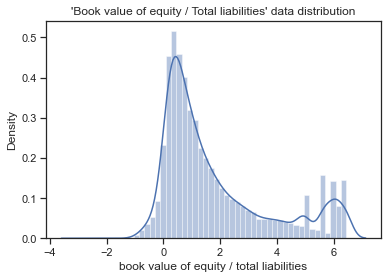

In [649]:
# Data distribution

sns.distplot(df["book value of equity / total liabilities"], kde=True)  
plt.title("'Book value of equity / Total liabilities' data distribution")
plt.show()

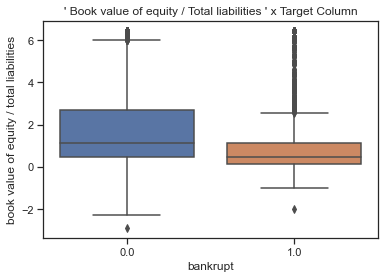

In [650]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['book value of equity / total liabilities'])
plt.title("' Book value of equity / Total liabilities ' x Target Column")
plt.show()

<AxesSubplot:xlabel='book value of equity / total liabilities', ylabel='total liabilities / total assets'>

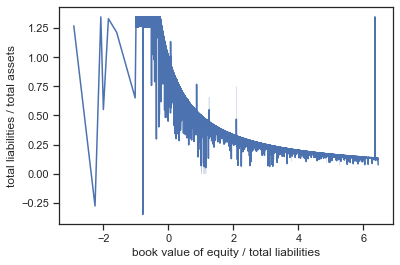

In [747]:
# relation between 'book value of equity / total liabilities' and 'total liabilities / total assets'
sns.lineplot(df['book value of equity / total liabilities'],df['total liabilities / total assets'])

<h1 style="color:purple;"> EDA on " Sales / Total assets " </h1>

Text(0.5, 1.0, " 'sales / total assets' data distribution")

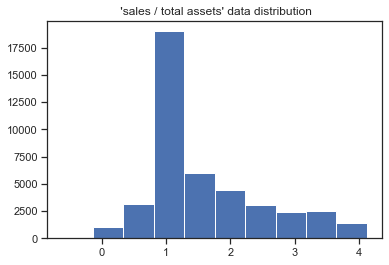

In [651]:
# Data distribution
plt.hist(df['sales / total assets'],bins=10)
plt.title (" 'sales / total assets' data distribution")

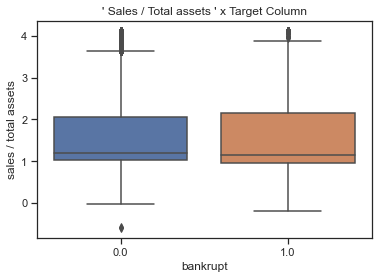

In [652]:
# Relation with the target column 

sns.boxplot(df['bankrupt'], df['sales / total assets'])
plt.title("' Sales / Total assets ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Equity / Total assets " </h1>

Text(0.5, 1.0, "'Equity / Total assets' ratio data distribution")

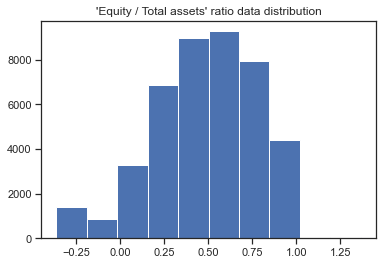

In [653]:
# Data distribution
plt.hist(df['equity / total assets'],bins=10)
plt.title ("'Equity / Total assets' ratio data distribution")

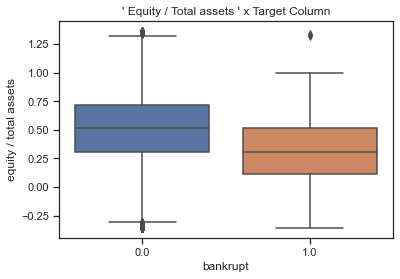

In [654]:
# Relation with the target column 

sns.boxplot(df['bankrupt'], df['equity / total assets'])
plt.title("' Equity / Total assets ' x Target Column")
plt.show()

<AxesSubplot:xlabel='equity / total assets', ylabel='total liabilities / total assets'>

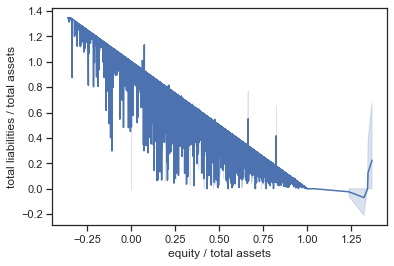

In [749]:
# relation between 'equity / total assets' and 'total liabilities / total assets'
sns.lineplot(df['equity / total assets'],df['total liabilities / total assets'])

<h1 style="color:purple;"> EDA on " (Gross profit + Extraordinary items + Financial expenses) / Total assets " </h1>

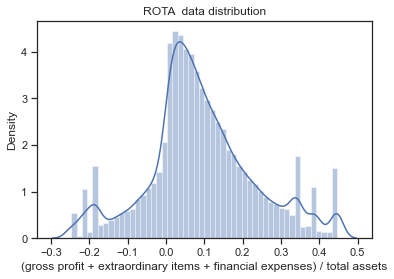

In [655]:
# Data distribution

sns.distplot(df["(gross profit + extraordinary items + financial expenses) / total assets"], kde=True)  
plt.title("ROTA  data distribution")
plt.show()

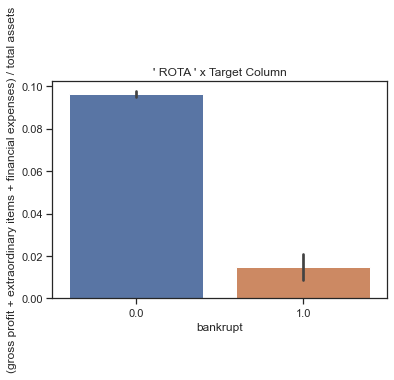

In [656]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['(gross profit + extraordinary items + financial expenses) / total assets'])
plt.title("' ROTA ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Gross profit / Short-term liabilities " </h1>

Text(0.5, 1.0, " 'Gross profit / Short-term liabilities' data distribution")

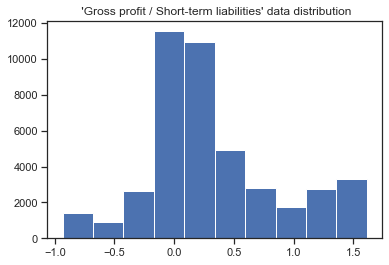

In [657]:
# Data distribution

plt.hist(df['gross profit / short-term liabilities'],bins=10)
plt.title (" 'Gross profit / Short-term liabilities' data distribution")

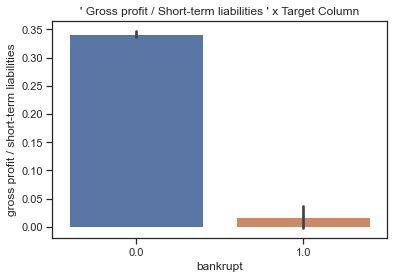

In [658]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['gross profit / short-term liabilities'])
plt.title("' Gross profit / Short-term liabilities ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " (Gross profit + Depreciation) / Sales " </h1>


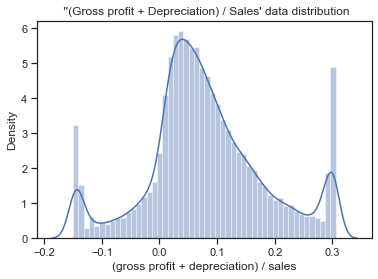

In [659]:
# Data distribution
sns.distplot(df["(gross profit + depreciation) / sales"], kde=True)  
plt.title(" ''(Gross profit + Depreciation) / Sales' data distribution")
plt.show()

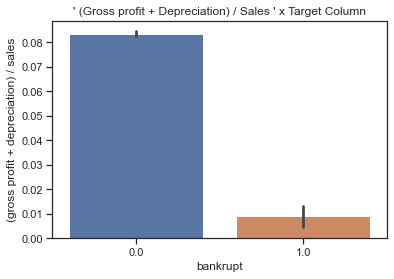

In [660]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['(gross profit + depreciation) / sales'])
plt.title("' (Gross profit + Depreciation) / Sales ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " (Gross profit + Interest) / Total assets " </h1>

Text(0.5, 1.0, "'(Gross profit + Interest) / Total assets'  data distribution")

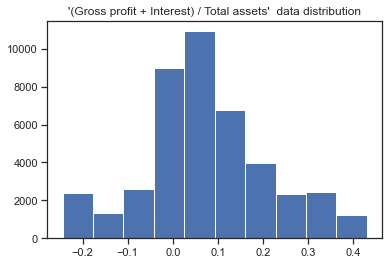

In [661]:
# Data distribution
plt.hist(df['(gross profit + interest) / total assets'],bins=10)
plt.title ("'(Gross profit + Interest) / Total assets'  data distribution")

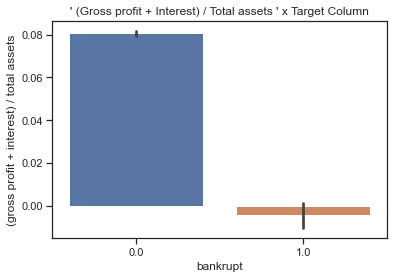

In [662]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['(gross profit + interest) / total assets'])
plt.title("' (Gross profit + Interest) / Total assets ' x Target Column")
plt.show()

Text(0.5, 1.0, "'Net profit / Total assets' x '(gross profit + interest) / total assets'")

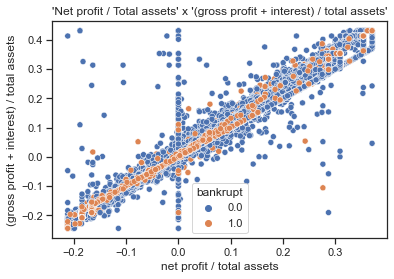

In [663]:
# Scatterplot between 'Net profit / Total assets' x '(Gross profit + Interest) / Total assets' x 'Bankrupt'

sns.scatterplot(df['net profit / total assets'], df['(gross profit + interest) / total assets'], hue=df['bankrupt'])
plt.title("'Net profit / Total assets' x '(gross profit + interest) / total assets'")

<AxesSubplot:xlabel='EBIT / total assets', ylabel='(gross profit + interest) / total assets'>

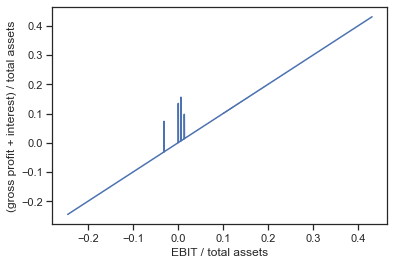

In [737]:
# Relationship between the 'EBIT / total assets' and ''(gross profit + interest) / total assets'.
sns.lineplot(df['EBIT / total assets'],df['(gross profit + interest) / total assets'])

<h1 style="color:purple;"> EDA on " (Gross profit + Depreciation) / Total liabilities " </h1>

Text(0.5, 1.0, " '(Gross profit + Depreciation) / Total liabilities' data distribution")

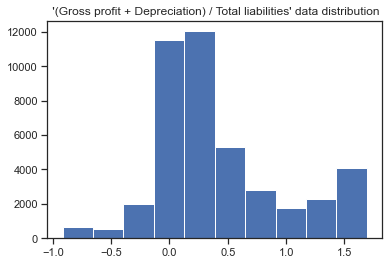

In [664]:
# Data distribution
plt.hist(df['(gross profit + depreciation) / total liabilities'],bins=10)
plt.title (" '(Gross profit + Depreciation) / Total liabilities' data distribution")

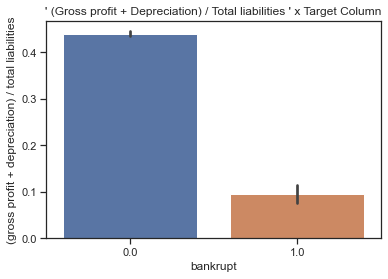

In [665]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['(gross profit + depreciation) / total liabilities'])
plt.title("' (Gross profit + Depreciation) / Total liabilities ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Total assets / Total liabilities " </h1>

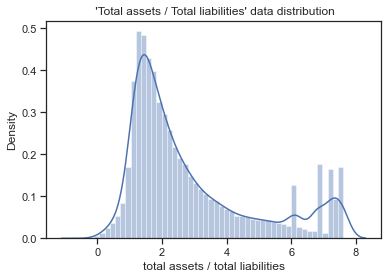

In [666]:
# Data distribution
sns.distplot(df["total assets / total liabilities"], kde=True)  
plt.title(" 'Total assets / Total liabilities' data distribution")
plt.show()

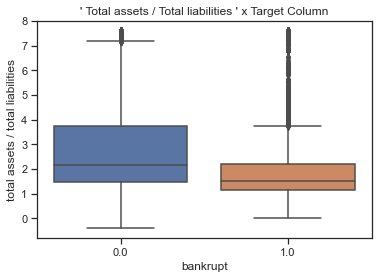

In [667]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['total assets / total liabilities'])
plt.title("' Total assets / Total liabilities ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Gross profit / Total assets " </h1>

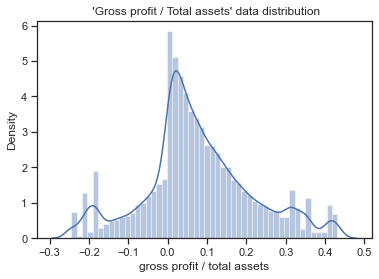

In [668]:
# Data distribution
sns.distplot(df["gross profit / total assets"], kde=True)  
plt.title(" 'Gross profit / Total assets' data distribution")
plt.show()

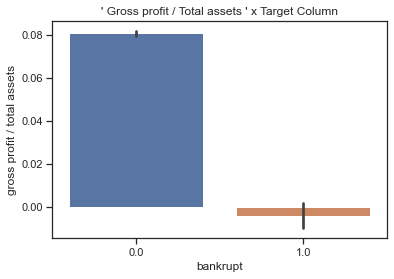

In [669]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['gross profit / total assets'])
plt.title("' Gross profit / Total assets ' x Target Column")
plt.show()

Text(0.5, 1.0, "'Net profit / Total assets' x 'gross profit / total assets'")

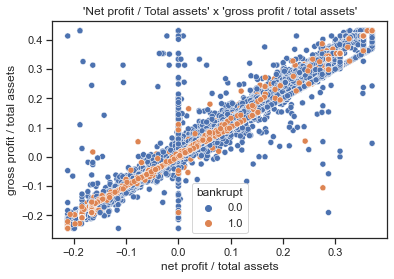

In [670]:
# Scatterplot between 'Net profit / Total assets' x 'Gross profit / Total assets' x 'Bankrupt'

sns.scatterplot(df['net profit / total assets'], df['gross profit / total assets'], hue=df['bankrupt'])
plt.title("'Net profit / Total assets' x 'gross profit / total assets'")

<h1 style="color:purple;"> EDA on " Gross profit / Sales " </h1>

Text(0.5, 1.0, "'Gross profit / Sales'  data distribution")

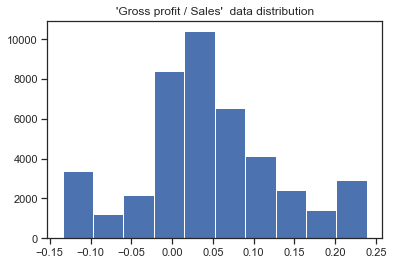

In [671]:
# Data distribution
plt.hist(df['gross profit / sales'],bins=10)
plt.title ("'Gross profit / Sales'  data distribution")

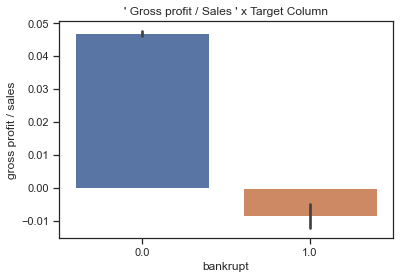

In [672]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['gross profit / sales'])
plt.title("' Gross profit / Sales ' x Target Column")
plt.show()

Text(0.5, 1.0, "'gross profit / sales' x 'net profit / sales'")

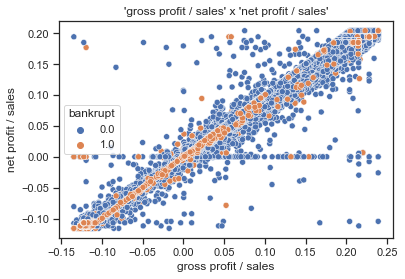

In [739]:
# Scatterplot between 'gross profit / sales' x 'net profit / sales' x 'Bankrupt'
sns.scatterplot(df['gross profit / sales'], df['net profit / sales'], hue=df['bankrupt'])
plt.title("'gross profit / sales' x 'net profit / sales'")

<h1 style="color:purple;"> EDA on " Sales (n) / Sales (n-1) " </h1>

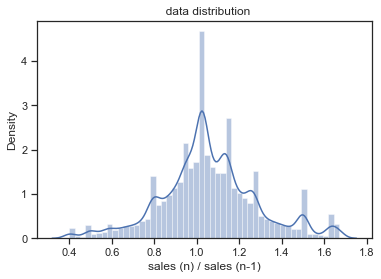

In [673]:
# Data distribution
sns.distplot(df["sales (n) / sales (n-1)"], kde=True)  
plt.title("  data distribution")
plt.show()

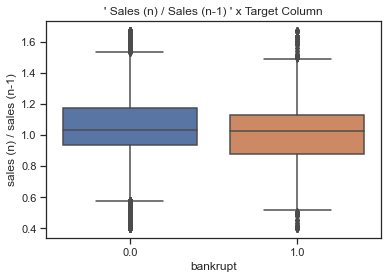

In [674]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['sales (n) / sales (n-1)'])
plt.title("' Sales (n) / Sales (n-1) ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Profit on operating activities / Total assets " </h1>

Text(0.5, 1.0, "'Profit on operating activities / Total assets'  data distribution")

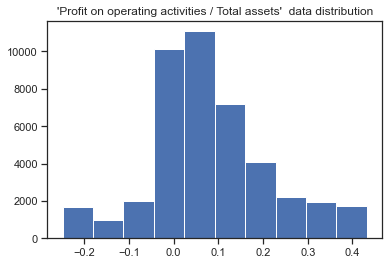

In [675]:
# Data distribution
plt.hist(df['profit on operating activities / total assets'],bins=10)
plt.title ("'Profit on operating activities / Total assets'  data distribution")

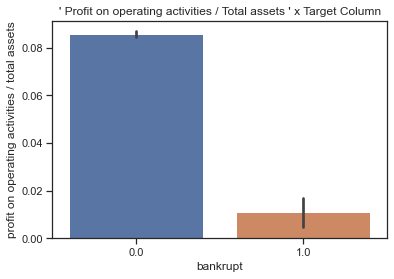

In [676]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['profit on operating activities / total assets'])
plt.title("' Profit on operating activities / Total assets ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Net profit / Sales " </h1>

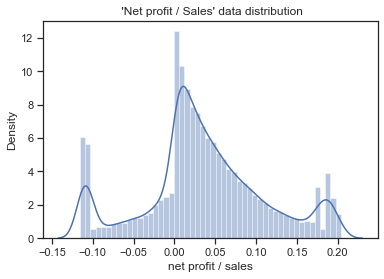

In [677]:
# Data distribution
sns.distplot(df["net profit / sales"], kde=True)  
plt.title(" 'Net profit / Sales' data distribution")
plt.show()

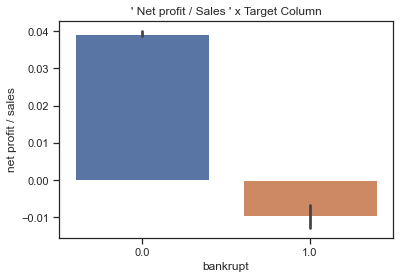

In [678]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['net profit / sales'])
plt.title("' Net profit / Sales ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Gross profit (in 3 years) / Total assets'], " </h1>

Text(0.5, 1.0, '  data distribution')

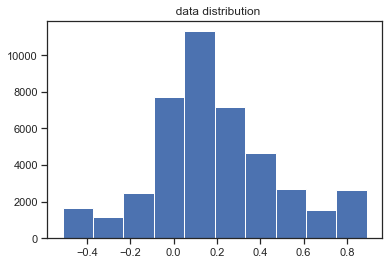

In [679]:
# Data distribution
plt.hist(df['gross profit (in 3 years) / total assets'],bins=10)
plt.title ("  data distribution")

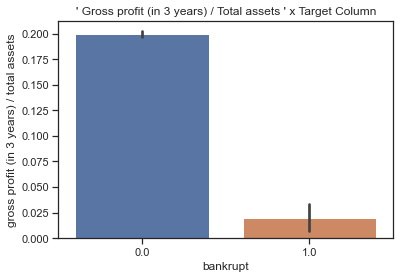

In [680]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['gross profit (in 3 years) / total assets'])
plt.title("' Gross profit (in 3 years) / Total assets ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " (Equity - Share capital) / Total assets " </h1>

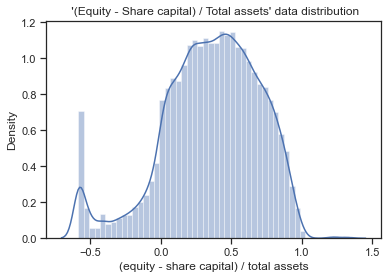

In [681]:
# Data distribution
sns.distplot(df["(equity - share capital) / total assets"], kde=True)  
plt.title(" '(Equity - Share capital) / Total assets' data distribution")
plt.show()

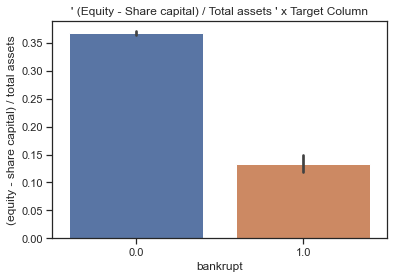

In [682]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['(equity - share capital) / total assets'])
plt.title("' (Equity - Share capital) / Total assets ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " (net profit + depreciation) / total liabilities " </h1>

Text(0.5, 1.0, "'(Net profit + Depreciation) / Total Liabilities' data distribution")

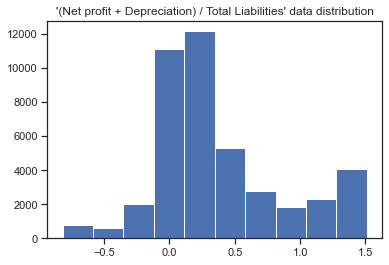

In [683]:
# Data distribution
plt.hist(df['(net profit + depreciation) / total liabilities'],bins=10)
plt.title ("'(Net profit + Depreciation) / Total Liabilities' data distribution")

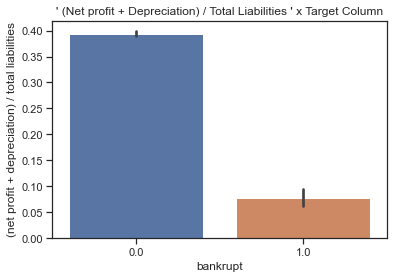

In [684]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['(net profit + depreciation) / total liabilities'])
plt.title("' (Net profit + Depreciation) / Total Liabilities ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Profit on operating activities / Financial expenses " </h1>

Text(0.5, 1.0, " 'Profit on operating activities / Financial expenses' data distribution")

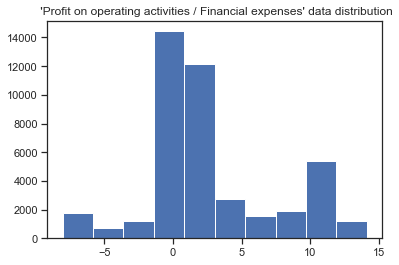

In [685]:
# Data distribution
plt.hist(df['profit on operating activities / financial expenses'],bins=10)
plt.title (" 'Profit on operating activities / Financial expenses' data distribution")

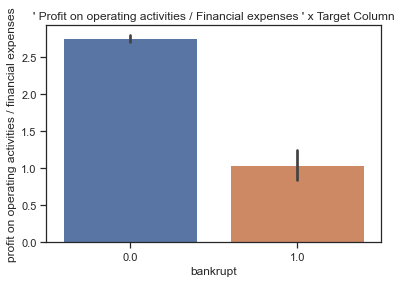

In [686]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['profit on operating activities / financial expenses'])
plt.title("' Profit on operating activities / Financial expenses ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Working capital / Fixed assets " </h1>

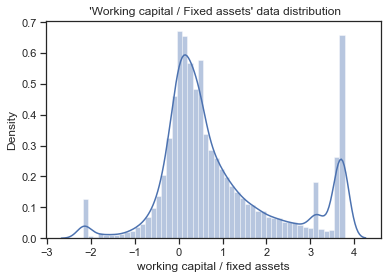

In [687]:
# Data distribution
sns.distplot(df["working capital / fixed assets"], kde=True)  
plt.title(" 'Working capital / Fixed assets' data distribution")
plt.show()

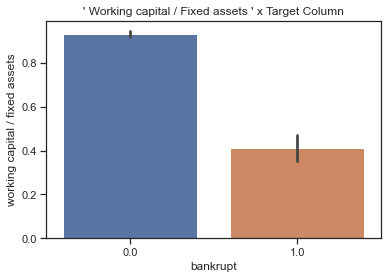

In [688]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['working capital / fixed assets'])
plt.title("' Working capital / Fixed assets ' x Target Column")
plt.show()

<AxesSubplot:xlabel='working capital / fixed assets', ylabel='constant capital / fixed assets'>

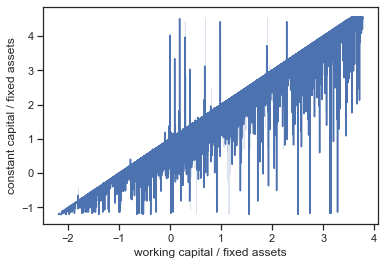

In [733]:
# the relation between 'working capital / fixed assets' and 'constant capital / fixed assets'
sns.lineplot(df['working capital / fixed assets'],df['constant capital / fixed assets'])

Text(0.5, 1.0, "'Working capital / Fixed assets' x 'Constant capital / Fixed assets'")

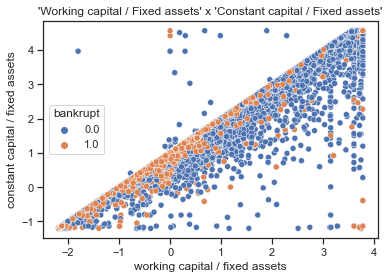

In [736]:
# Scatterplot between 'working capital / fixed assets' x 'constant capital / fixed assets' x 'Bankrupt'

sns.scatterplot(df['working capital / fixed assets'], df['constant capital / fixed assets'], hue=df['bankrupt'])
plt.title("'Working capital / Fixed assets' x 'Constant capital / Fixed assets'")

<h1 style="color:purple;"> EDA on " Logarithm of total assets " </h1>

Text(0.5, 1.0, "'Logarithm of total assets'  data distribution")

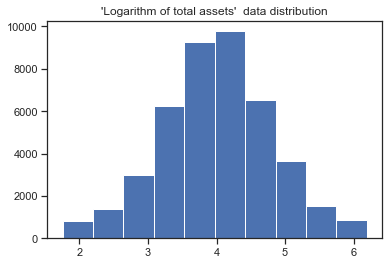

In [689]:
# Data distribution
plt.hist(df['logarithm of total assets'],bins=10)
plt.title ("'Logarithm of total assets'  data distribution")

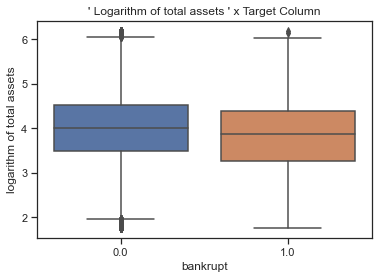

In [690]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['logarithm of total assets'])
plt.title("' Logarithm of total assets ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " (Total liabilities - Cash) / Sales " </h1>

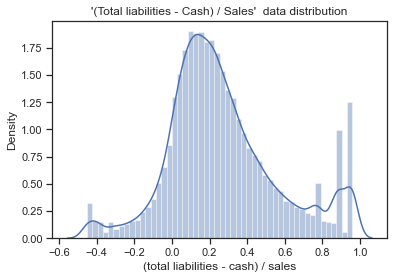

In [691]:
# Data distribution
sns.distplot(df["(total liabilities - cash) / sales"], kde=True)  
plt.title("'(Total liabilities - Cash) / Sales'  data distribution")
plt.show()

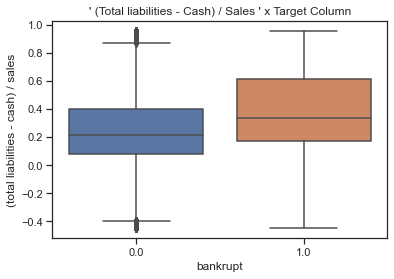

In [692]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['(total liabilities - cash) / sales'])
plt.title("' (Total liabilities - Cash) / Sales ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " (Gross profit + Interest) / Sales " </h1>

Text(0.5, 1.0, " '(Gross profit + Interest) / Sales' data distribution")

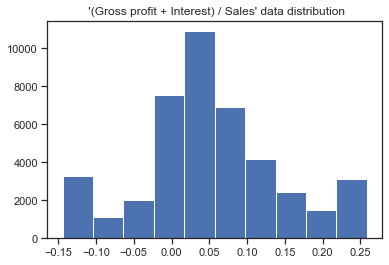

In [693]:
# Data distribution
plt.hist(df['(gross profit + interest) / sales'],bins=10)
plt.title (" '(Gross profit + Interest) / Sales' data distribution")

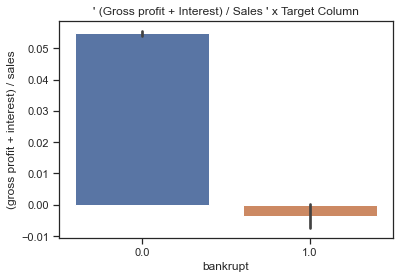

In [694]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['(gross profit + interest) / sales'])
plt.title("' (Gross profit + Interest) / Sales ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Operating expenses / Short-term liabilities " </h1>

Text(0.5, 1.0, " 'Operating expenses / Short-term liabilities' data distribution")

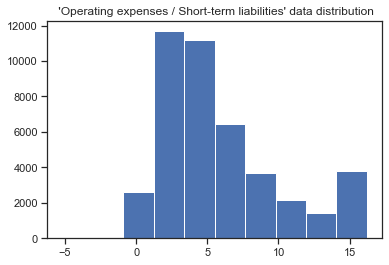

In [695]:
# Data distribution
plt.hist(df['operating expenses / short-term liabilities'],bins=10)
plt.title (" 'Operating expenses / Short-term liabilities' data distribution")

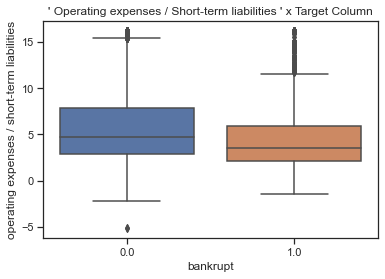

In [696]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['operating expenses / short-term liabilities'])
plt.title("' Operating expenses / Short-term liabilities ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Operating expenses / Total liabilities " </h1>

Text(0.5, 1.0, " 'Operating expenses / Total liabilities' data distribution")

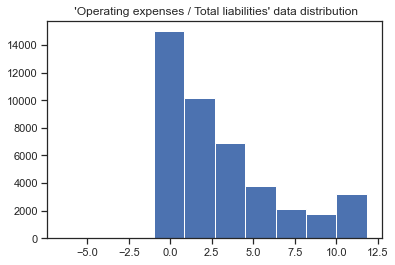

In [697]:
# Data distribution
plt.hist(df['operating expenses / total liabilities'],bins=10)
plt.title (" 'Operating expenses / Total liabilities' data distribution")

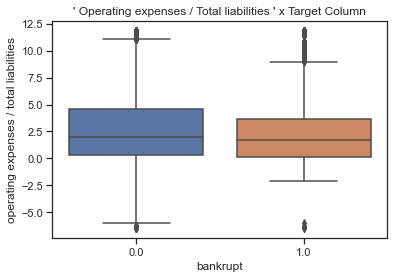

In [698]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['operating expenses / total liabilities'])
plt.title("' Operating expenses / Total liabilities ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Profit on sales / Total assets " </h1>

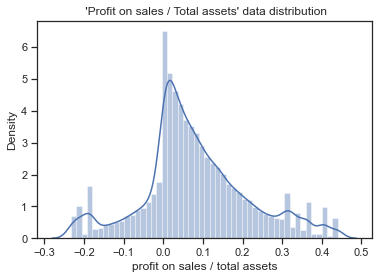

In [699]:
# Data distribution
sns.distplot(df["profit on sales / total assets"], kde=True)  
plt.title(" 'Profit on sales / Total assets' data distribution")
plt.show()

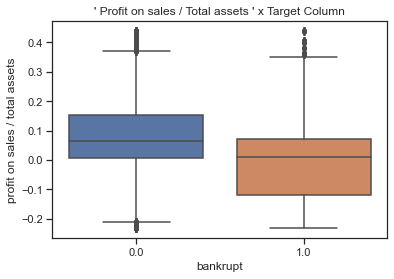

In [700]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['profit on sales / total assets'])
plt.title("' Profit on sales / Total assets ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Total sales / Total assets " </h1>

Text(0.5, 1.0, ' Total sales / Total assets data distribution')

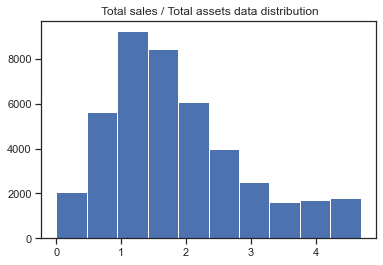

In [701]:
# Data distribution
plt.hist(df['total sales / total assets'],bins=10)
plt.title (" Total sales / Total assets data distribution")

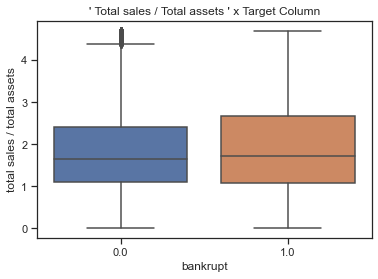

In [702]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['total sales / total assets'])
plt.title("' Total sales / Total assets ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " (Current assets - Inventories) / Long-term liabilities " </h1>

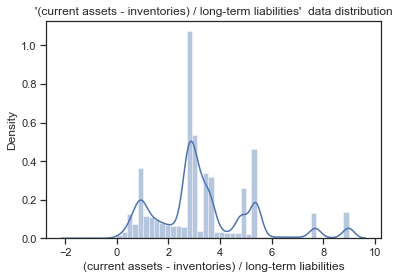

In [703]:
# Data distribution
sns.distplot(df["(current assets - inventories) / long-term liabilities"], kde=True)  
plt.title("'(current assets - inventories) / long-term liabilities'  data distribution")
plt.show()

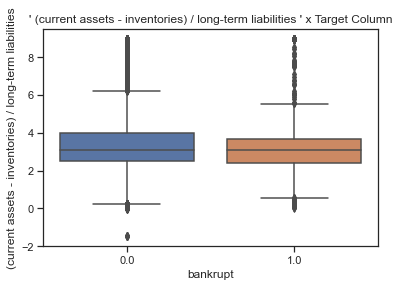

In [704]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['(current assets - inventories) / long-term liabilities'])
plt.title("' (current assets - inventories) / long-term liabilities ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Constant capital / Total assets " </h1>

Text(0.5, 1.0, " 'constant capital / total assets' data distribution")

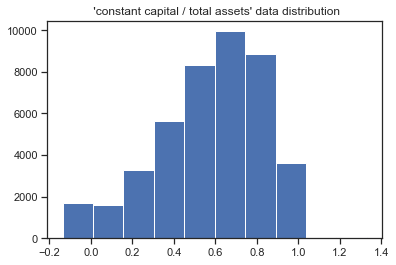

In [705]:
# Data distribution
plt.hist(df['constant capital / total assets'],bins=10)
plt.title (" 'constant capital / total assets' data distribution")

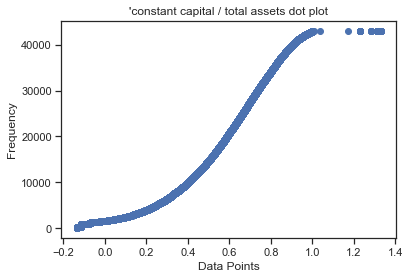

In [706]:
data_series = pd.Series(df['constant capital / total assets'])
data_series = data_series.sort_values()

plt.plot(data_series, range(1, len(data_series) + 1), marker='o', linestyle='none')
plt.xlabel('Data Points')
plt.ylabel('Frequency')
plt.title("'constant capital / total assets dot plot")
plt.show()

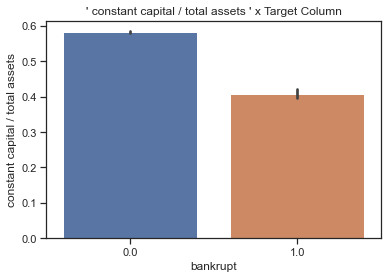

In [707]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['constant capital / total assets'])
plt.title("' constant capital / total assets ' x Target Column")
plt.show()

<AxesSubplot:xlabel='constant capital / total assets', ylabel='short-term liabilities / total assets'>

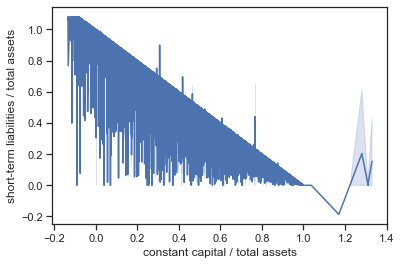

In [751]:
# relation between 'constant capital / total assets' and 'short-term liabilities / total assets'
sns.lineplot(df['constant capital / total assets'],df['short-term liabilities / total assets'])

<h1 style="color:purple;"> EDA on " Profit on sales / Sales " </h1>

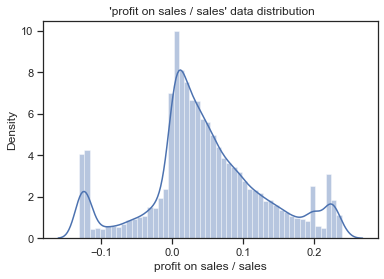

In [708]:
# Data distribution
sns.distplot(df["profit on sales / sales"], kde=True)  
plt.title(" 'profit on sales / sales' data distribution")
plt.show()

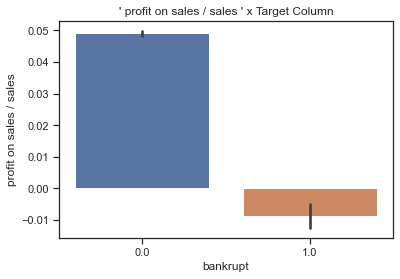

In [709]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['profit on sales / sales'])
plt.title("' profit on sales / sales ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " (Current assets - Inventory - Receivables) / Short-term liabilities " </h1>

Text(0.5, 1.0, " '(current assets - inventory - receivables) / short-term liabilities' data distribution")

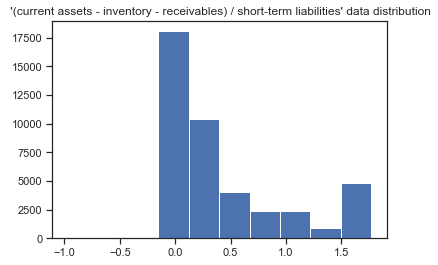

In [710]:
# Data distribution
plt.hist(df['(current assets - inventory - receivables) / short-term liabilities'],bins=10)
plt.title (" '(current assets - inventory - receivables) / short-term liabilities' data distribution")

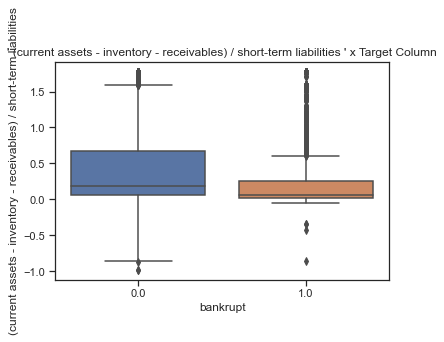

In [711]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['(current assets - inventory - receivables) / short-term liabilities'])
plt.title("' (current assets - inventory - receivables) / short-term liabilities ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Profit on operating activities / Sales " </h1>

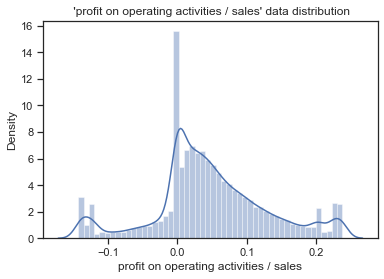

In [712]:
# Data distribution
sns.distplot(df["profit on operating activities / sales"], kde=True)  
plt.title(" 'profit on operating activities / sales' data distribution")
plt.show()

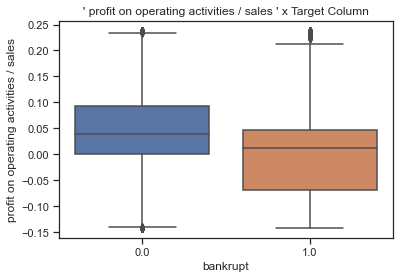

In [713]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['profit on operating activities / sales'])
plt.title("' profit on operating activities / sales ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Rotation receivables + Inventory turnover in days " </h1>

Text(0.5, 1.0, " 'rotation receivables + inventory turnover in days' data distribution")

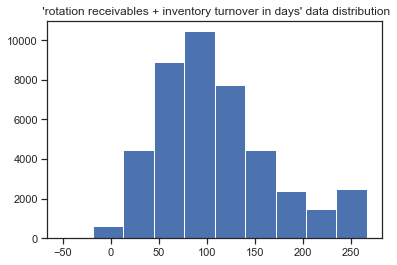

In [714]:
# Data distribution
plt.hist(df['rotation receivables + inventory turnover in days'],bins=10)
plt.title (" 'rotation receivables + inventory turnover in days' data distribution")

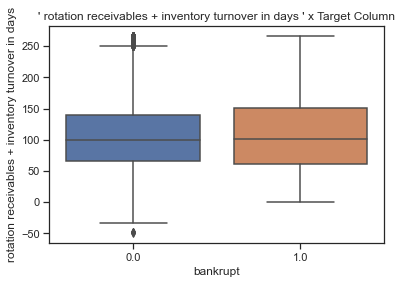

In [715]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['rotation receivables + inventory turnover in days'])
plt.title("' rotation receivables + inventory turnover in days ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Net profit / Inventory " </h1>

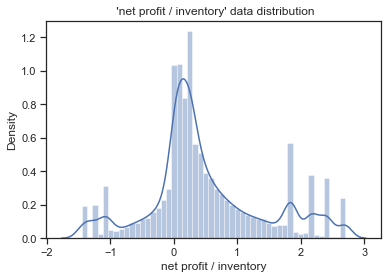

In [716]:
# Data distribution
sns.distplot(df["net profit / inventory"], kde=True)  
plt.title(" 'net profit / inventory' data distribution")
plt.show() 

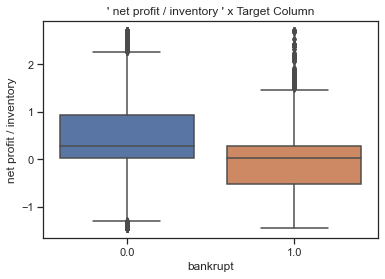

In [717]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['net profit / inventory'])
plt.title("' net profit / inventory ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " (Current assets - Inventory) / Short-term liabilities " </h1>

Text(0.5, 1.0, " '(current assets - inventory) / short-term liabilities' data distribution")

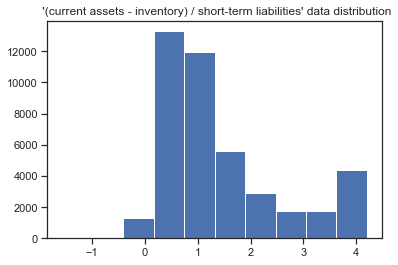

In [718]:
# Data distribution
plt.hist(df['(current assets - inventory) / short-term liabilities'],bins=10)
plt.title (" '(current assets - inventory) / short-term liabilities' data distribution")

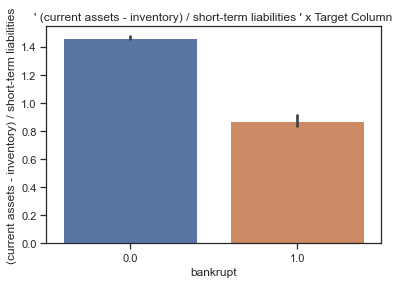

In [719]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['(current assets - inventory) / short-term liabilities'])
plt.title("' (current assets - inventory) / short-term liabilities ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " EBITDA (profit on operating activities - depreciation) / Total assets " </h1>

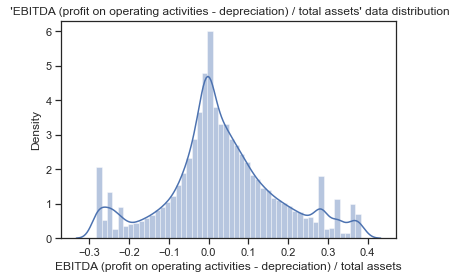

In [720]:
# Data distribution
sns.distplot(df["EBITDA (profit on operating activities - depreciation) / total assets"], kde=True)  
plt.title(" 'EBITDA (profit on operating activities - depreciation) / total assets' data distribution")
plt.show() 

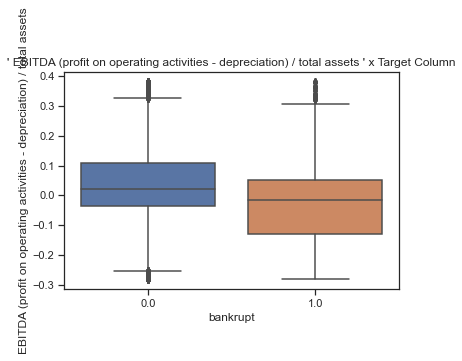

In [721]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['EBITDA (profit on operating activities - depreciation) / total assets'])
plt.title("' EBITDA (profit on operating activities - depreciation) / total assets ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " EBITDA (profit on operating activities - depreciation) / sales " </h1>

Text(0.5, 1.0, " 'EBITDA (profit on operating activities - depreciation) / sales' data distribution")

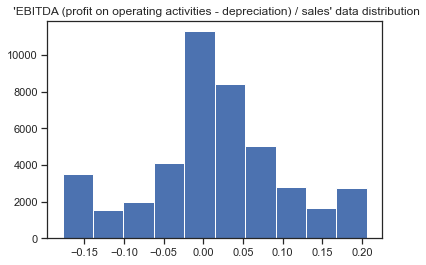

In [722]:
# Data distribution
plt.hist(df['EBITDA (profit on operating activities - depreciation) / sales'],bins=10)
plt.title (" 'EBITDA (profit on operating activities - depreciation) / sales' data distribution")

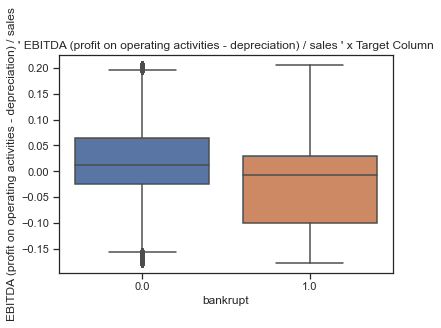

In [723]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['EBITDA (profit on operating activities - depreciation) / sales'])
plt.title("' EBITDA (profit on operating activities - depreciation) / sales ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Current assets / Total liabilities " </h1>

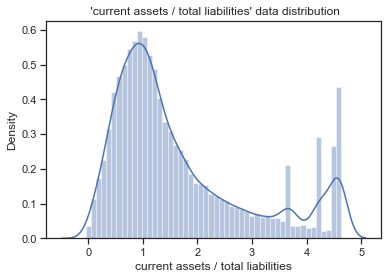

In [724]:
# Data distribution
sns.distplot(df["current assets / total liabilities"], kde=True)  
plt.title(" 'current assets / total liabilities' data distribution")
plt.show() 

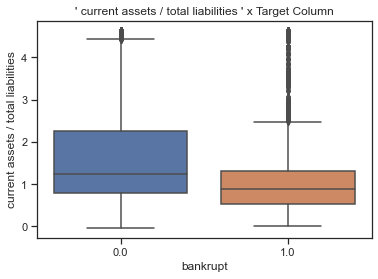

In [725]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['current assets / total liabilities'])
plt.title("' current assets / total liabilities ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Short-term liabilities / Total assets " </h1>

Text(0.5, 1.0, " 'short-term liabilities / total assets' data distribution")

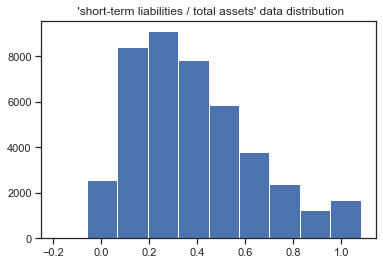

In [726]:
# Data distribution
plt.hist(df['short-term liabilities / total assets'],bins=10)
plt.title (" 'short-term liabilities / total assets' data distribution")

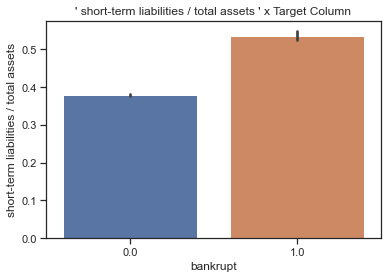

In [727]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['short-term liabilities / total assets'])
plt.title("' short-term liabilities / total assets ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Equity / Fixed assets " </h1>

Text(0.5, 1.0, " 'Equity / Fixed assets' data distribution")

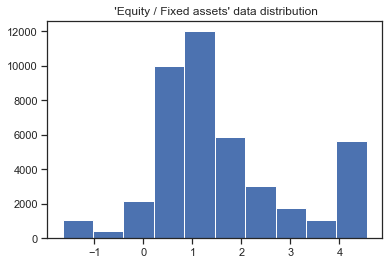

In [728]:
# Data distribution
plt.hist(df['equity / fixed assets'],bins=10)
plt.title (" 'Equity / Fixed assets' data distribution")

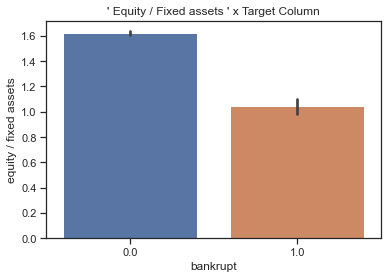

In [729]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['equity / fixed assets'])
plt.title("' Equity / Fixed assets ' x Target Column")
plt.show()

<AxesSubplot:xlabel='working capital / fixed assets', ylabel='equity / fixed assets'>

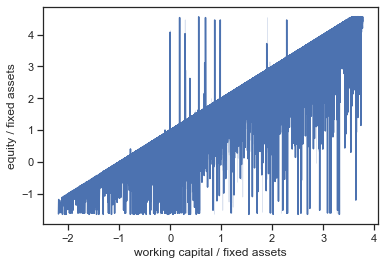

In [732]:
sns.lineplot(df['working capital / fixed assets'],df['equity / fixed assets'])

Text(0.5, 1.0, "'Working capital / Fixed assets' x 'Equity / Fixed assets'")

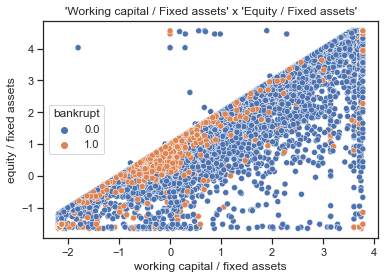

In [735]:
# Scatterplot between 'working capital / fixed assets' x 'equity / fixed assets' x 'Bankrupt'

sns.scatterplot(df['working capital / fixed assets'], df['equity / fixed assets'], hue=df['bankrupt'])
plt.title("'Working capital / Fixed assets' x 'Equity / Fixed assets'")

<h1 style="color:purple;"> EDA on " Constant capital / Fixed assets " </h1>

In [ ]:
# Data distribution
plt.hist(df['constant capital / fixed assets'],bins=10)
plt.title (" 'constant capital / fixed assets' data distribution")

In [ ]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['constant capital / fixed assets'])
plt.title("' constant capital / fixed assets ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Working capital " </h1>

In [ ]:
# Data distribution
plt.hist(df['working capital'],bins=10)
plt.title (" 'working capital' data distribution")

In [ ]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['working capital'])
plt.title("' working capital ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " (Sales - Cost of products sold) / Sales " </h1>

In [ ]:
# Data distribution
sns.distplot(df["(sales - cost of products sold) / sales"], kde=True)  
plt.title(" '(sales - cost of products sold) / sales' data distribution")
plt.show() 

In [ ]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['(sales - cost of products sold) / sales'])
plt.title("'(sales - cost of products sold) / sales  ' x Target Column")
plt.show()

<AxesSubplot:xlabel='(sales - cost of products sold) / sales', ylabel='total costs /total sales'>

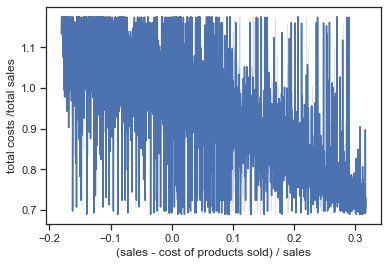

In [755]:
# relation between 'sales - cost of products sold) / sales' and 'total cost / total sales'
sns.lineplot(df['(sales - cost of products sold) / sales'],df['total costs /total sales'])

<h1 style="color:purple;"> EDA on " Total costs /Total sales " </h1>

In [ ]:
# Data distribution
plt.hist(df['total costs /total sales'],bins=10)
plt.title (" 'total costs /total sales' data distribution")

In [ ]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['total costs /total sales'])
plt.title("' total costs /total sales ' x Target Column")
plt.show()

In [ ]:
# sns.jointplot(x='total costs /total sales', y='net profit / total assets', data=df, kind='scatter')
# plt.title('Joint Plot')
# plt.show()

plt.hexbin(df['total costs /total sales'], df['net profit / total assets'], gridsize=20, cmap='Blues', edgecolors='grey')
plt.colorbar(label='Frequency')
plt.xlabel('Variable1')
plt.ylabel('Variable2')
plt.title('Hexbin Plot for Two Columns')
plt.show()

<h1 style="color:purple;"> EDA on " Long-term liabilities / Equity
 " </h1>

In [ ]:
# Data distribution
sns.distplot(df["long-term liabilities / equity"], kde=True)  
plt.title(" 'long-term liabilities / equity' data distribution")
plt.show() 

In [ ]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['long-term liabilities / equity'])
plt.title("' long-term liabilities / equity' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Sales / Inventory " </h1>

In [ ]:
# Data distribution
sns.distplot(df["sales / inventory"], kde=True)  
plt.title(" 'sales / inventory' data distribution")
plt.show() 

In [ ]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['sales / inventory'])
plt.title("' sales / inventory ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Sales / Receivables " </h1>

In [ ]:
# Data distribution
plt.hist(df['sales / receivables'],bins=10)
plt.title (" 'sales / receivables' data distribution")

In [ ]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['sales / receivables'])
plt.title("'sales / receivables  ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " (Short-term liabilities *365) / Sales " </h1>

In [ ]:
# Data distribution
plt.hist(df['(short-term liabilities *365) / sales'],bins=10)
plt.title (" '(short-term liabilities *365) / sales' data distribution")

In [ ]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['(short-term liabilities *365) / sales'])
plt.title("' (short-term liabilities *365) / sales ' x Target Column")
plt.show()

<h1 style="color:purple;"> EDA on " Sales / Short-term liabilities " </h1>

In [ ]:
# Data distribution
sns.distplot(df["sales / short-term liabilities"], kde=True)  
plt.title(" 'sales / short-term liabilities' data distribution")
plt.show()

In [ ]:
# Relation with the target column 
sns.barplot(df['bankrupt'], df['sales / short-term liabilities'])
plt.title("' sales / short-term liabilities ' x Target Column")
plt.show()

<AxesSubplot:xlabel='sales / short-term liabilities', ylabel='operating expenses / short-term liabilities'>

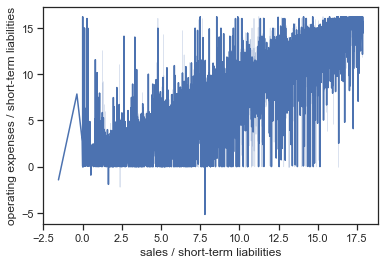

In [745]:
# relation between 'sales / short-term liabilities' and 'operating expenses / short-term liabilities' 
sns.lineplot(df['sales / short-term liabilities'],df['operating expenses / short-term liabilities'])

Text(0.5, 1.0, "'sales / short-term liabilities' x 'operating expenses / short-term liabilities'")

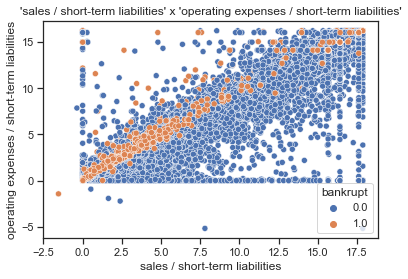

In [746]:
# Scatterplot between 'sales / short-term liabilities' x 'operating expenses / short-term liabilities' x 'Bankrupt'
sns.scatterplot(df['sales / short-term liabilities'], df['operating expenses / short-term liabilities'], hue=df['bankrupt'])
plt.title("'sales / short-term liabilities' x 'operating expenses / short-term liabilities'")

<h1 style="color:purple;"> EDA on " Sales / Fixed assets " </h1>

In [ ]:
# Data distribution
sns.distplot(df["sales / fixed assets"], kde=True)  
plt.title(" 'sales / fixed assets' data distribution")
plt.show()

In [ ]:
# Relation with the target column 
sns.boxplot(df['bankrupt'], df['sales / fixed assets'])
plt.title("' sales / fixed assets ' x Target Column")
plt.show()